In [10]:
import json
import re
import html

with open('data/messages.json', 'r', encoding='utf-8') as file:
    text = file.read()   
msgs = json.loads(text)
kravchenkos_msgs = msgs['conversations'][0]['MessageList']
nicks2names = {
    '8:kraftjrivo' : 'Ваня',
    '8:marigenk' : 'Маша',
    '8:tim.kravchenko' : 'Тима',
    '8:stepan.kravchenko1' : 'Стёпа',
    '8:krovinos' : 'Вася'
}
result = ''
last_time = ''
last_from = ''
last_content = ''
print('parsing...')
msgs_sorted = {}
for msg in reversed(kravchenkos_msgs):
    if (msg['properties'] is None) or (not 'isserversidegenerated' in msg['properties']):
        idd = int(msg['id'])
        msgs_sorted[idd] = msg
print(len(msgs_sorted))
msgs_sorted = sorted(msgs_sorted.items())
base_json = { 'type': 'chatml', 'messages':[{'role':'system', 'content':'CubeXfiles'},{'role':'user', 'content':'<TMP>'}], 'source': 'self-made' }
jsonl_result = ''
cur_json = base_json
for msg_ in msgs_sorted:
    msg = msg_[1]
    fromm = msg['from']
    if fromm not in nicks2names:
        continue
    content = html.unescape(msg['content'])
    content = re.sub(r'<URIObject.*</URIObject>', '<КАРТИНКА>', content)
    content = re.sub(r'<partlist.*</partlist>', '<ЧТО-ТО>', content)
    content = re.sub(r'<MediaAlbum.*</MediaAlbum>', '<ЧТО-ТО>', content)
    content = re.sub(r'<quote.*</legacyquote>((\n|.)*)<legacyquote>.*(\n|.)*</quote>', '<ЦИТАТА:\\1>\n\t', content)
    #content = re.sub(r'<a.*href="(.*)".*</a>', '<ССЫЛКА:\\1>', content)
    content = re.sub(r'<a.*href="(.*)".*</a>', '<ССЫЛКА>', content)
    content = re.sub(r'<ss[^>]*>([^/]*)</ss>', '\\1', content)
    content = re.sub(r'<b[^>]*>([^/]*)</b>', '\\1', content)
    content = re.sub(r'<s[^>]*>([^/]*)</s>', '\\1', content)
    content = re.sub(r'<u[^>]*>([^/]*)</u>', '\\1', content)
    content = re.sub(r'<i[^>]*>([^/]*)</i>', '\\1', content)
    content = re.sub(r'<pre[^>]*>([^/]*)</pre>', '\\1', content)
    content = re.sub(r'<e_m(.*)</e_m>', '', content)
    content = re.sub(r'<at(.*)</at>', '', content)
    content = content.replace('\n', '\n\t')
    content = content.replace('\t\t', '\t')
    if content == last_content or len(content) == 0:
        continue
    time = msg['originalarrivaltime'][:11]
    if last_time != time:
        jsonl_result += json.dumps(cur_json, ensure_ascii=False)
        cur_json = base_json
        cur_json['messages'][1]['content'] = time
        last_time = time
        result += time + '\n'
    if last_from != fromm:
        last_from = fromm
        result += nicks2names[fromm].upper() + ':'
    cur_json['messages'].append({'role':'assistant', 'content':(nicks2names[fromm].upper() + ':\t' + content + '\n')})
    last_content = content
    result += '\t' + content + '\n'

chars = sorted(list(set(result)))
counts = { ch:result.count(ch) for ch in chars}
tststr = " !\"%&()+,-.'/0123456789:<=>?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz{}ЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяё\n\t"
for ch in chars:
    if tststr.count(ch) == 0:
        result = result.replace(ch, '?')
        jsonl_result = jsonl_result.replace(ch, '?')
chars = sorted(list(set(result)))
counts = { ch:result.count(ch) for ch in chars}
#sorted(counts.items(), key=lambda item: -item[1])

with open('data/messages.txt', 'w', encoding='utf-8') as file:
    file.write(result)
with open('data/cbx_data.jsonl', 'w', encoding='utf-8') as file:
    file.write(jsonl_result)
print('written "messages.txt" and "cbx_data.jsonl".')

parsing...
24771


In [113]:
sorted(counts.items(), key=lambda item: -item[1])

[(' ', 116498),
 ('о', 74926),
 ('а', 57646),
 ('е', 54685),
 ('т', 49388),
 ('и', 45509),
 ('н', 44352),
 ('с', 33496),
 ('р', 30665),
 ('л', 27876),
 ('\n', 26223),
 ('в', 26140),
 ('к', 25284),
 ('\t', 25144),
 ('А', 21407),
 ('д', 20156),
 ('м', 20059),
 ('у', 19898),
 ('п', 19160),
 (':', 16371),
 ('?', 14901),
 ('я', 13541),
 ('ь', 12836),
 (',', 12463),
 ('Т', 12395),
 ('ы', 11817),
 ('б', 11119),
 ('ч', 11016),
 ('з', 10488),
 ('г', 10416),
 ('И', 8991),
 ('.', 7925),
 ('й', 7542),
 ('Н', 7054),
 ('ж', 6956),
 ('В', 6354),
 ('С', 6238),
 ('-', 6225),
 ('М', 6137),
 ('К', 5937),
 ('х', 5605),
 ('Я', 5585),
 ('t', 5315),
 ('e', 5162),
 ('ш', 5092),
 (')', 4502),
 ('ю', 4346),
 ('2', 4243),
 ('0', 4032),
 ('>', 4008),
 ('<', 3993),
 ('a', 3929),
 ('/', 3874),
 ('o', 3865),
 ('ё', 3701),
 ('s', 3380),
 ('П', 3322),
 ('э', 3210),
 ('i', 3192),
 ('r', 3146),
 ('n', 3128),
 ('c', 2881),
 ('!', 2816),
 ('m', 2780),
 ('Р', 2622),
 ('h', 2527),
 ('w', 2516),
 ('ц', 2514),
 ('u', 2473),
 

In [114]:
len(result)

1102649

In [121]:
low_res = result.lower()
wcounts = { w:low_res.count(w) for w in re.findall(r'[а-яё\-]+', low_res.lower()) if len(w) > 2} 
print(sorted(wcounts.items(), key=lambda item: -item[1]))

[('тим', 5396), ('тима', 5241), ('ван', 4542), ('аня', 4163), ('ваня', 4126), ('что', 2624), ('арт', 2530), ('про', 2499), ('карт', 2437), ('стёпа', 2433), ('это', 2242), ('картинка', 2225), ('как', 1702), ('так', 1576), ('ого', 1569), ('вас', 1483), ('ста', 1421), ('вася', 1353), ('его', 1342), ('ест', 1317), ('при', 1314), ('ить', 1217), ('сто', 1202), ('мен', 1164), ('раз', 1117), ('или', 1076), ('дел', 1025), ('тор', 1023), ('тел', 991), ('под', 955), ('пол', 928), ('аль', 922), ('цита', 887), ('цитата', 882), ('ани', 855), ('мож', 840), ('ель', 836), ('вид', 802), ('пос', 792), ('ссылка', 788), ('всё', 783), ('все', 753), ('вот', 752), ('ещё', 740), ('ник', 739), ('был', 728), ('том', 728), ('ком', 721), ('они', 692), ('дно', 642), ('кой', 639), ('ног', 616), ('луч', 607), ('ран', 607), ('нет', 599), ('уже', 599), ('там', 596), ('нос', 583), ('кол', 580), ('ход', 562), ('только', 556), ('ела', 544), ('ума', 535), ('ему', 530), ('над', 522), ('сам', 521), ('если', 508), ('дум', 508

In [117]:
ТИМА - 5209
ВАНЯ - 4072
СТЁПА - 2413
ВАСЯ - 1308
МАША - 233

[('о', 74926),
 ('а', 57646),
 ('е', 54685),
 ('т', 49388),
 ('и', 45509),
 ('н', 44352),
 ('с', 33496),
 ('р', 30665),
 ('л', 27876),
 ('в', 26140),
 ('к', 25284),
 ('А', 21407),
 ('д', 20156),
 ('м', 20059),
 ('у', 19898),
 ('п', 19160),
 ('я', 13541),
 ('ь', 12836),
 ('Т', 12395),
 ('то', 11846),
 ('б', 11119),
 ('ч', 11016),
 ('з', 10488),
 ('г', 10416),
 ('И', 8991),
 ('но', 8514),
 ('не', 7863),
 ('на', 7730),
 ('й', 7542),
 ('ст', 7303),
 ('по', 7227),
 ('Н', 7054),
 ('ж', 6956),
 ('В', 6354),
 ('ра', 6336),
 ('ка', 6280),
 ('С', 6238),
 ('ко', 6226),
 ('М', 6137),
 ('К', 5937),
 ('та', 5874),
 ('х', 5605),
 ('Я', 5585),
 ('ть', 5444),
 ('ни', 5429),
 ('от', 5314),
 ('ен', 5287),
 ('ли', 5216),
 ('ТИМА', 5209),
 ('ш', 5092),
 ('ов', 5084),
 ('ет', 5071),
 ('пр', 5022),
 ('ре', 4570),
 ('го', 4464),
 ('ю', 4346),
 ('он', 4301),
 ('во', 4221),
 ('ва', 4184),
 ('АН', 4091),
 ('ВАНЯ', 4072),
 ('те', 4069),
 ('ор', 4042),
 ('да', 3974),
 ('де', 3929),
 ('ль', 3784),
 ('ел', 3701),
 (

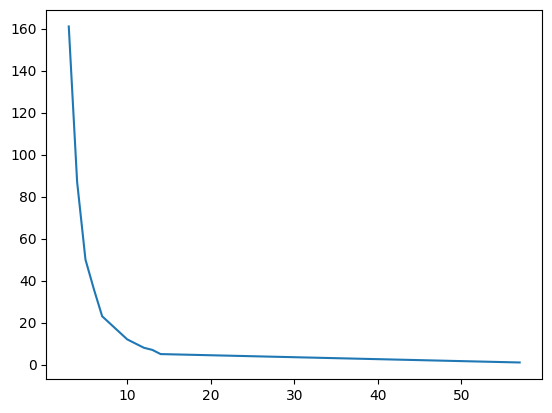

In [126]:
import matplotlib.pyplot as plt

'один' -- 190
'два' -- 98
'три' -- 382
'четыре' -- 20
'пять' -- 96
'шесть' -- 13
'семь' -- 19
'восемь' -- 8
'девять' -- 4
'десять' -- 5
plt.plot([3,4,5,6,7,10,11,12,13,14,57], [190, 98, 382, 20, 96, 13, 19, 8, 4, 5])

(array([6., 0., 2., 0., 1., 0., 0., 0., 0., 1.]),
 array([  4. ,  41.8,  79.6, 117.4, 155.2, 193. , 230.8, 268.6, 306.4,
        344.2, 382. ]),
 <BarContainer object of 10 artists>)

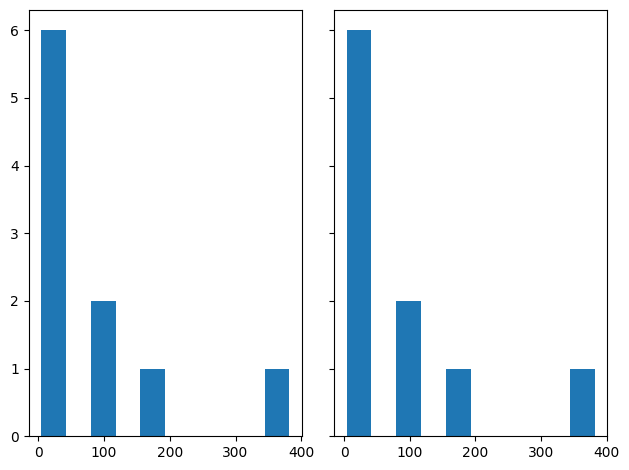

In [127]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist([190, 98, 382, 20, 96, 13, 19, 8, 4, 5], bins=10)
axs[1].hist([190, 98, 382, 20, 96, 13, 19, 8, 4, 5], bins=10)